In [1]:
# IST 718 Group Project - Recordable Incidents and Near Misses in the Workplace
# Kim Greene, Teng Siong Yeap, Brandon Croarkin, and Amanda Sausville

# import packages needed for analysis
from matplotlib.pylab import plt
%matplotlib inline
from nltk.tokenize import RegexpTokenizer
import pandas as pd  # data frame operations
from pandas import ExcelWriter
from pandas import ExcelFile
import pandasql as pdsql
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#import dataset
Incidents = pd.read_excel('Incidents_and_NearMisses.xlsx', sheet_name='Sheet1')
incidentsDF = pd.DataFrame(Incidents)
incidentsDF.head()

,IncidentNo,IncidentType,CompanyName,Location,DateofOccurrence,YearofOccurrence,IncidentSummary,Area,IncidentDescription,InjuryDescripti,...,DaysonJobTransf,EmpIDCalc,InjustStatus,OccupationofInjured,OperationAtTimeofInjury,OSHARecordable,SBP,SOCCaption,SOCValue,MISS_PotentialImpact
0,130,Sprain,Company D,"Midland, TX",2013-04-21,2013,I.E. was pushing kelly hose off to the driller...,Rig Floor,I.E. was pushing kelly hose off to the driller...,contusions to those areas from slipping and st...,...,0,10711.0,First Aid,MOTOR_DRILLING,Rigging Down,0.0,Back (Lower),Texas,TX,NaN
1,131,Strain,Company D,"Rices Landing, PA",2013-04-05,2013,ee slipped on bottom step of stairs from mud t...,Stairs / Ladders,ee slipped on bottom step of stairs from mud t...,Strain to neck as a result of catching himself...,...,0,10713.0,First Aid,DERRICK_DRILLING,Well Control / BOP,0.0,Neck,West Virginia,WV,NaN
2,132,Strain,Company E,"Williston, ND",2013-04-18,2013,Ee was pulling back a stand of tubing while in...,Derrick / Mast,Ee was pulling back a stand of tubing while in...,Pain and stiffness in lower to middle right si...,...,0,21651.0,No Medical,DERRICK_WELL,Laying Down / Picking Up Pipe / Tubulars,0.0,Back (Lower),North Dakota,ND,NaN
3,136,Fracture,Company D,"Corpus Christi, TX",2013-04-04,2013,Ee's right ring fnger was caught between bushi...,Rig Floor,Ee's right ring fnger was caught between bushi...,Fracture of right ring finger as a result of f...,...,8,7025.0,Restricted Work Case,MOTOR_DRILLING,Making Connection,1.0,Finger,Texas,TX,NaN
4,138,Strain,Company E,"Williston, ND",2013-04-16,2013,Crew was rigging down the floor. Travis was li...,Rig Floor,Crew was rigging down the floor. Travis was li...,"Pain in upper back between shoulder blades, mo...",...,0,21065.0,First Aid,OPERATOR_WELL,Rigging Down,0.0,Back (Upper),North Dakota,ND,NaN


In [3]:
print(incidentsDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 23 columns):
IncidentNo                 3678 non-null int64
IncidentType               3678 non-null object
CompanyName                3678 non-null object
Location                   3678 non-null object
DateofOccurrence           3678 non-null datetime64[ns]
YearofOccurrence           3678 non-null int64
IncidentSummary            3678 non-null object
Area                       3678 non-null object
IncidentDescription        3678 non-null object
InjuryDescripti            1951 non-null object
DateHiredCalc              1952 non-null datetime64[ns]
YearsatCompany             3678 non-null float64
DaysAwayFromWor            3678 non-null int64
DaysonJobTransf            3678 non-null int64
EmpIDCalc                  1952 non-null float64
InjustStatus               1952 non-null object
OccupationofInjured        1944 non-null object
OperationAtTimeofInjury    1952 non-null object
OSHARecordable 

In [4]:
#Drop IncidentNo, IncidentSummary, InjuryDescripti
incidentsDF = incidentsDF.drop(['IncidentNo', 'IncidentSummary','InjuryDescripti'], axis=1)
incidentsDF

,IncidentType,CompanyName,Location,DateofOccurrence,YearofOccurrence,Area,IncidentDescription,DateHiredCalc,YearsatCompany,DaysAwayFromWor,DaysonJobTransf,EmpIDCalc,InjustStatus,OccupationofInjured,OperationAtTimeofInjury,OSHARecordable,SBP,SOCCaption,SOCValue,MISS_PotentialImpact
0,Sprain,Company D,"Midland, TX",2013-04-21,2013,Rig Floor,I.E. was pushing kelly hose off to the driller...,2011-04-20,7.90,0,0,10711.0,First Aid,MOTOR_DRILLING,Rigging Down,0.0,Back (Lower),Texas,TX,NaN
1,Strain,Company D,"Rices Landing, PA",2013-04-05,2013,Stairs / Ladders,ee slipped on bottom step of stairs from mud t...,2011-09-14,7.49,0,0,10713.0,First Aid,DERRICK_DRILLING,Well Control / BOP,0.0,Neck,West Virginia,WV,NaN
2,Strain,Company E,"Williston, ND",2013-04-18,2013,Derrick / Mast,Ee was pulling back a stand of tubing while in...,2012-10-09,6.42,0,0,21651.0,No Medical,DERRICK_WELL,Laying Down / Picking Up Pipe / Tubulars,0.0,Back (Lower),North Dakota,ND,NaN
3,Fracture,Company D,"Corpus Christi, TX",2013-04-04,2013,Rig Floor,Ee's right ring fnger was caught between bushi...,2012-02-23,7.05,0,8,7025.0,Restricted Work Case,MOTOR_DRILLING,Making Connection,1.0,Finger,Texas,TX,NaN
4,Strain,Company E,"Williston, ND",2013-04-16,2013,Rig Floor,Crew was rigging down the floor. Travis was li...,2011-10-31,7.36,0,0,21065.0,First Aid,OPERATOR_WELL,Rigging Down,0.0,Back (Upper),North Dakota,ND,NaN
5,Irritation / Inflammation,Company D,"Corpus Christi, TX",2013-04-21,2013,Derrick / Mast,While Mr. Sanchez was on the derrick board adj...,2009-10-26,9.38,0,0,6150.0,No Medical,DERRICK_DRILLING,Tripping Out,0.0,Eye (Right),Texas,TX,NaN
6,Abrasion,Company F,"Broussard, LA",2013-02-18,2013,Barge,While 3 men were in personnel basket waiting f...,2012-12-18,6.23,0,0,18309.0,No Medical,OPSENG_WIRELINE,Other,0.0,Leg (Right),Louisiana,LA,NaN
7,Contusion,Company E,"Williston, ND",2013-04-19,2013,Derrick / Mast,The crew was pulling pipe into the well. Emplo...,2012-08-29,6.53,0,0,21599.0,First Aid,DERRICK_WELL,Tripping In,0.0,Head,North Dakota,ND,NaN
8,Strain,Company F,"Dickinson, ND",2013-01-12,2013,Inland Wellsite,Matt was lifting the end of a lube from the gr...,2012-04-02,6.94,0,0,18159.0,No Medical,OPERATOR_WIR_NONEXEMPT,Rigging Down,0.0,Back (Lower),North Dakota,ND,NaN
9,Fracture,Company F,"Victoria, TX",2013-01-11,2013,Inland Wellsite,"After successful packer setting, tool string w...",2011-10-10,7.42,122,0,18025.0,Lost Time Incident,OPERATOR_WIR_EXEMPT,Rigging Down,1.0,Foot (Right),Texas,TX,NaN


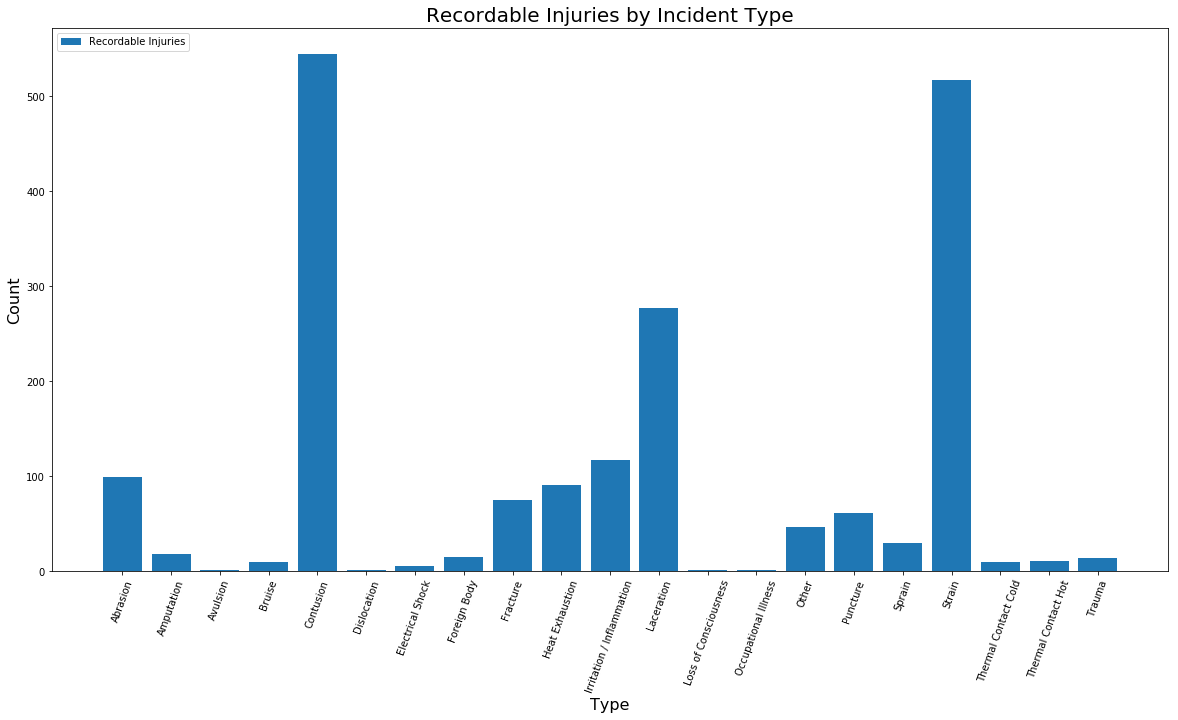

In [5]:
pysql = lambda q: pdsql.sqldf(q, globals())

# Create bar plot showing injuries by Incident Type
q = """SELECT IncidentType, Count(*) [Recordable Injuries] from incidentsDF where IncidentType <> 'Near Miss' group by IncidentType;"""
inctypeDF = pysql(q)

x = inctypeDF['IncidentType']
y= inctypeDF['Recordable Injuries']

plt.figure(figsize=(20,10))
plt.bar(x,y, label='Recordable Injuries')
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
plt.legend(loc='upper left')
plt.title('Recordable Injuries by Incident Type', fontsize=20)
plt.xlabel('Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()


In [6]:
#create dataframe showing injury trend by company

q = """SELECT distinct YearofOccurrence from incidentsDF order by YearofOccurrence;"""
yearsdf = pysql(q)

q = """SELECT CompanyName, count(*) [InjuryCount], YearofOccurrence from incidentsDF  group by CompanyName, YearofOccurrence order by YearofOccurrence;"""
trend1df = pysql(q)

q = """SELECT a.YearofOccurrence, CASE WHEN b.CompanyName='Company A' THEN InjuryCount Else 0 END [CompanyA] ,
        CASE WHEN b.CompanyName='Company B' THEN InjuryCount Else 0 END [CompanyB],
        CASE WHEN b.CompanyName='Company C' THEN InjuryCount Else 0 END [CompanyC],
        CASE WHEN b.CompanyName='Company D' THEN InjuryCount Else 0 END [CompanyD],
        CASE WHEN b.CompanyName='Company E' THEN InjuryCount Else 0 END [CompanyE],
        CASE WHEN b.CompanyName='Company F' THEN InjuryCount Else 0 END [CompanyF]
        FROM yearsdf a left join trend1df b on a.YearofOccurrence=b.YearofOccurrence;"""
trend2df = pysql(q)

q="""SELECT YearofOccurrence, SUM(CompanyA) [CompanyA], SUM(CompanyB) [CompanyB], SUM(CompanyC) [CompanyC],
        SUM(CompanyD) [CompanyD], SUM(CompanyE) [CompanyE], SUM(CompanyF) [CompanyF] from trend2df GROUP BY YearofOccurrence;"""
Trenddf = pysql(q)

#drop 2019 as it's not a complete year
Trenddf = Trenddf.drop(Trenddf[Trenddf.YearofOccurrence == 2019].index)
Trenddf

,YearofOccurrence,CompanyA,CompanyB,CompanyC,CompanyD,CompanyE,CompanyF
0,2013,6,6,23,443,151,71
1,2014,2,3,26,690,264,121
2,2015,0,2,27,215,138,70
3,2016,1,1,20,250,88,129
4,2017,0,3,17,140,90,156
5,2018,0,1,15,139,124,196


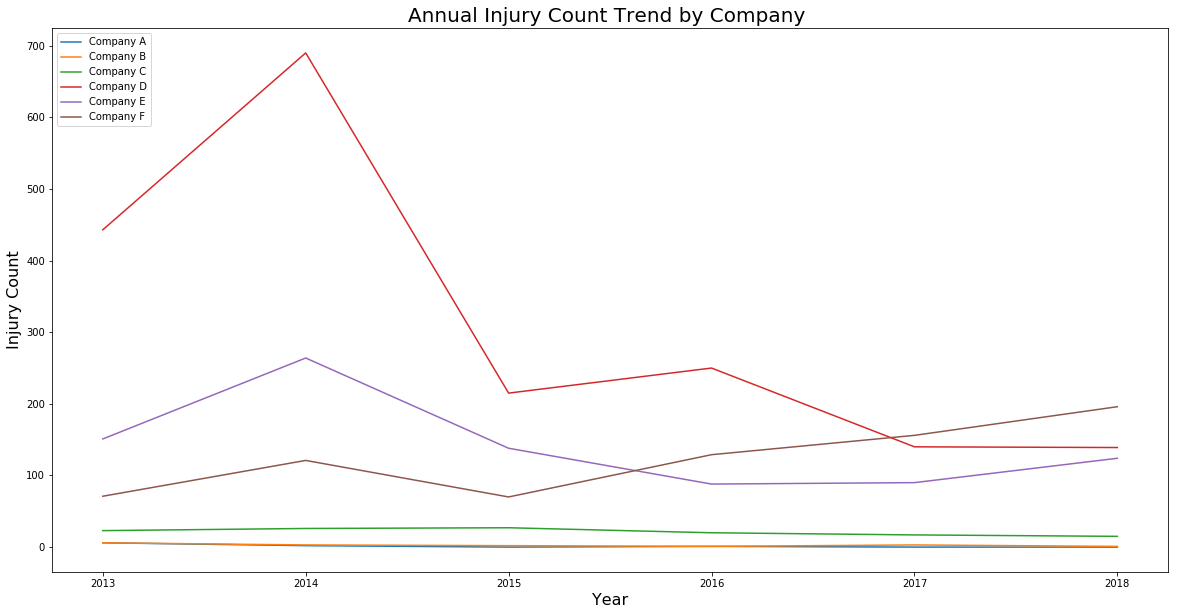

In [7]:
x = Trenddf['YearofOccurrence']
Y1 = Trenddf['CompanyA']
Y2 = Trenddf['CompanyB']
Y3 = Trenddf['CompanyC']
Y4 = Trenddf['CompanyD']
Y5 = Trenddf['CompanyE']
Y6 = Trenddf['CompanyF']

plt.figure(figsize=(20,10))
plt.plot(x,Y1, label='Company A')
plt.plot(x,Y2, label='Company B')
plt.plot(x,Y3, label='Company C')
plt.plot(x,Y4, label='Company D')
plt.plot(x,Y5, label='Company E')
plt.plot(x,Y6, label='Company F')

plt.legend(loc='upper left')
plt.title('Annual Injury Count Trend by Company ', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Injury Count', fontsize=16)
plt.show()


In [8]:
#separate Incident and near miss
nm = incidentsDF[incidentsDF['IncidentType'] == "Near Miss"]
nm

,IncidentType,CompanyName,Location,DateofOccurrence,YearofOccurrence,Area,IncidentDescription,DateHiredCalc,YearsatCompany,DaysAwayFromWor,DaysonJobTransf,EmpIDCalc,InjustStatus,OccupationofInjured,OperationAtTimeofInjury,OSHARecordable,SBP,SOCCaption,SOCValue,MISS_PotentialImpact
95,Near Miss,Company F,"Billings, MT",2013-04-26 05:00:00,2013,Inland Wellsite,Incident occured when crane operator scoped ou...,NaT,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High Risk (HPI)
96,Near Miss,Company F,"Dickinson, ND",2013-05-02 05:00:00,2013,Inland Wellsite,Employee removed lubricator from wellhead befo...,NaT,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium Risk
98,Near Miss,Company F,"Williston, ND",2013-05-04 05:00:00,2013,Inland Wellsite,While running power to the perforating trailer...,NaT,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High Risk (HPI)
100,Near Miss,Company F,"Dickinson, ND",2013-05-08 05:00:00,2013,Inland Wellsite,When pressure testing our lubricator we had le...,NaT,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium Risk
125,Near Miss,Company E,"Conway, AR",2013-11-18 00:00:00,2013,Other (Specify),"While rigging up Scanalog equipment, the opera...",NaT,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High Risk (HPI)
142,Near Miss,Company E,"Conway, AR",2013-11-18 00:00:00,2013,Other (Specify),"While installing the wiper rubber, the operato...",NaT,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium Risk
145,Near Miss,Company E,"Conway, AR",2014-02-09 00:00:00,2014,Derrick / Mast,"While TOH with 1"" rods, the derrick hand picke...",NaT,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium Risk
151,Near Miss,Company E,"Greenbrier, AR",2013-05-28 05:00:00,2013,Tubing Board,Operator looked up and noticed pins that hold ...,NaT,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High Risk (HPI)
166,Near Miss,Company E,"Williston, ND",2014-02-18 00:00:00,2014,Rig Floor,"While rigging up hydrotest tools, the operator...",NaT,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low Risk
190,Near Miss,Company E,"Williston, ND",2013-06-04 05:00:00,2013,Rig Floor,Pusher stepped on floor wing and the weld on t...,NaT,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium Risk


In [9]:
inc = incidentsDF[incidentsDF['IncidentType'] != "Near Miss"]
inc

,IncidentType,CompanyName,Location,DateofOccurrence,YearofOccurrence,Area,IncidentDescription,DateHiredCalc,YearsatCompany,DaysAwayFromWor,DaysonJobTransf,EmpIDCalc,InjustStatus,OccupationofInjured,OperationAtTimeofInjury,OSHARecordable,SBP,SOCCaption,SOCValue,MISS_PotentialImpact
0,Sprain,Company D,"Midland, TX",2013-04-21,2013,Rig Floor,I.E. was pushing kelly hose off to the driller...,2011-04-20,7.90,0,0,10711.0,First Aid,MOTOR_DRILLING,Rigging Down,0.0,Back (Lower),Texas,TX,NaN
1,Strain,Company D,"Rices Landing, PA",2013-04-05,2013,Stairs / Ladders,ee slipped on bottom step of stairs from mud t...,2011-09-14,7.49,0,0,10713.0,First Aid,DERRICK_DRILLING,Well Control / BOP,0.0,Neck,West Virginia,WV,NaN
2,Strain,Company E,"Williston, ND",2013-04-18,2013,Derrick / Mast,Ee was pulling back a stand of tubing while in...,2012-10-09,6.42,0,0,21651.0,No Medical,DERRICK_WELL,Laying Down / Picking Up Pipe / Tubulars,0.0,Back (Lower),North Dakota,ND,NaN
3,Fracture,Company D,"Corpus Christi, TX",2013-04-04,2013,Rig Floor,Ee's right ring fnger was caught between bushi...,2012-02-23,7.05,0,8,7025.0,Restricted Work Case,MOTOR_DRILLING,Making Connection,1.0,Finger,Texas,TX,NaN
4,Strain,Company E,"Williston, ND",2013-04-16,2013,Rig Floor,Crew was rigging down the floor. Travis was li...,2011-10-31,7.36,0,0,21065.0,First Aid,OPERATOR_WELL,Rigging Down,0.0,Back (Upper),North Dakota,ND,NaN
5,Irritation / Inflammation,Company D,"Corpus Christi, TX",2013-04-21,2013,Derrick / Mast,While Mr. Sanchez was on the derrick board adj...,2009-10-26,9.38,0,0,6150.0,No Medical,DERRICK_DRILLING,Tripping Out,0.0,Eye (Right),Texas,TX,NaN
6,Abrasion,Company F,"Broussard, LA",2013-02-18,2013,Barge,While 3 men were in personnel basket waiting f...,2012-12-18,6.23,0,0,18309.0,No Medical,OPSENG_WIRELINE,Other,0.0,Leg (Right),Louisiana,LA,NaN
7,Contusion,Company E,"Williston, ND",2013-04-19,2013,Derrick / Mast,The crew was pulling pipe into the well. Emplo...,2012-08-29,6.53,0,0,21599.0,First Aid,DERRICK_WELL,Tripping In,0.0,Head,North Dakota,ND,NaN
8,Strain,Company F,"Dickinson, ND",2013-01-12,2013,Inland Wellsite,Matt was lifting the end of a lube from the gr...,2012-04-02,6.94,0,0,18159.0,No Medical,OPERATOR_WIR_NONEXEMPT,Rigging Down,0.0,Back (Lower),North Dakota,ND,NaN
9,Fracture,Company F,"Victoria, TX",2013-01-11,2013,Inland Wellsite,"After successful packer setting, tool string w...",2011-10-10,7.42,122,0,18025.0,Lost Time Incident,OPERATOR_WIR_EXEMPT,Rigging Down,1.0,Foot (Right),Texas,TX,NaN


In [10]:
#this function will take a column variable, concatenate all the injury descriptions, apply stop words
#and generate a word cloud
def myCloud (description):
    text = " ".join(desc for desc in description)
    print ("There are {} words in the combination of all description.".format(len(text)))
    
    # Create stopword list:
    stopwords = set(STOPWORDS)
    stopwords.update(["employee","EE","IE"])
    
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords,  max_words=50, background_color="white").generate(text)
    
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

There are 324238 words in the combination of all description.


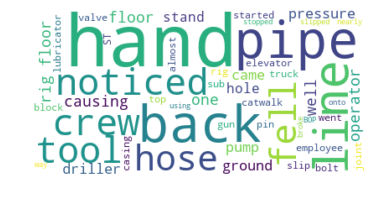

There are 511929 words in the combination of all description.


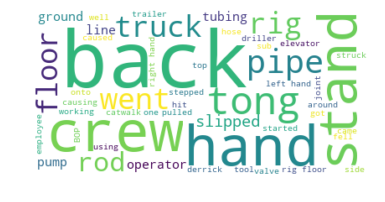

In [11]:
#word cloud for Near Miss
myCloud(nm.IncidentDescription)

#word cloud for Incident
myCloud(inc.IncidentDescription)

In [12]:
#create a term document matrix

#make InjuryDescription to become a list
doc = incidentsDF.IncidentDescription.tolist()
doc[:5]

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

vec = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
X = vec.fit_transform(doc)

tdm = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
tdm.shape

(3678, 5634)

In [13]:
tdm.head()

,0,00,000,00pm,01,02,03,0300,04,05,...,yolk,zac,zack,zep,zero,zeroes,zinc,zip,zipper,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#merge incidentsDF and tdm
df_merged = incidentsDF.merge(tdm, how='outer', left_index=True, right_index=True)
df_merged.head()

,IncidentType,CompanyName,Location,DateofOccurrence,YearofOccurrence,Area,IncidentDescription,DateHiredCalc,YearsatCompany,DaysAwayFromWor,...,yolk,zac,zack,zep,zero,zeroes,zinc,zip,zipper,zone
0,Sprain,Company D,"Midland, TX",2013-04-21,2013,Rig Floor,I.E. was pushing kelly hose off to the driller...,2011-04-20,7.90,0,...,0,0,0,0,0,0,0,0,0,0
1,Strain,Company D,"Rices Landing, PA",2013-04-05,2013,Stairs / Ladders,ee slipped on bottom step of stairs from mud t...,2011-09-14,7.49,0,...,0,0,0,0,0,0,0,0,0,0
2,Strain,Company E,"Williston, ND",2013-04-18,2013,Derrick / Mast,Ee was pulling back a stand of tubing while in...,2012-10-09,6.42,0,...,0,0,0,0,0,0,0,0,0,0
3,Fracture,Company D,"Corpus Christi, TX",2013-04-04,2013,Rig Floor,Ee's right ring fnger was caught between bushi...,2012-02-23,7.05,0,...,0,0,0,0,0,0,0,0,0,0
4,Strain,Company E,"Williston, ND",2013-04-16,2013,Rig Floor,Crew was rigging down the floor. Travis was li...,2011-10-31,7.36,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#create a new column named "Label". If the IncidentType is NOT "Near Miss", change it to "Incident"
df_merged['Label'] = df_merged['IncidentType']
df_merged['Label'] = ['Near Miss' if x == 'Near Miss' else 'Incident' for x in df_merged['Label']]
df_merged.head()
df_merged.tail()

,IncidentType,CompanyName,Location,DateofOccurrence,YearofOccurrence,Area,IncidentDescription,DateHiredCalc,YearsatCompany,DaysAwayFromWor,...,zac,zack,zep,zero,zeroes,zinc,zip,zipper,zone,Label
0,Sprain,Company D,"Midland, TX",2013-04-21,2013,Rig Floor,I.E. was pushing kelly hose off to the driller...,2011-04-20,7.90,0,...,0,0,0,0,0,0,0,0,0,Incident
1,Strain,Company D,"Rices Landing, PA",2013-04-05,2013,Stairs / Ladders,ee slipped on bottom step of stairs from mud t...,2011-09-14,7.49,0,...,0,0,0,0,0,0,0,0,0,Incident
2,Strain,Company E,"Williston, ND",2013-04-18,2013,Derrick / Mast,Ee was pulling back a stand of tubing while in...,2012-10-09,6.42,0,...,0,0,0,0,0,0,0,0,0,Incident
3,Fracture,Company D,"Corpus Christi, TX",2013-04-04,2013,Rig Floor,Ee's right ring fnger was caught between bushi...,2012-02-23,7.05,0,...,0,0,0,0,0,0,0,0,0,Incident
4,Strain,Company E,"Williston, ND",2013-04-16,2013,Rig Floor,Crew was rigging down the floor. Travis was li...,2011-10-31,7.36,0,...,0,0,0,0,0,0,0,0,0,Incident


,IncidentType,CompanyName,Location,DateofOccurrence,YearofOccurrence,Area,IncidentDescription,DateHiredCalc,YearsatCompany,DaysAwayFromWor,...,zac,zack,zep,zero,zeroes,zinc,zip,zipper,zone,Label
3673,Near Miss,Company F,"Williston, ND",2019-02-06,2019,Shop,Employee was walking in the PCE of shop with e...,NaT,0.0,0,...,0,0,0,0,0,0,0,0,0,Near Miss
3674,Near Miss,Company F,"Brighton, CO",2019-02-07,2019,Vehicle,"While driving to meet co-workers, employee was...",NaT,0.0,0,...,0,0,0,0,0,0,0,0,0,Near Miss
3675,Near Miss,Company D,"Howard, TX",2019-02-12,2019,Derrick / Mast,On top drive inspection the stabbing guide had...,NaT,0.0,0,...,0,0,0,0,0,0,0,0,0,Near Miss
3676,Near Miss,Company D,"Reeves, TX",2019-02-11,2019,Rig Floor,"While rigging up cementers, C & J cementers em...",NaT,0.0,0,...,0,0,0,0,0,0,1,0,0,Near Miss
3677,Near Miss,Company D,"Reeves, TX",2019-02-03,2019,Water / Fuel Storage Tank,Employee was walking backwards on the water ta...,NaT,0.0,0,...,0,0,0,0,0,0,0,0,0,Near Miss
